In [1]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

torch.set_grad_enabled(False);

1.7.0+cu101 True


In [2]:
!git clone https://github.com/facebookresearch/detr.git

Cloning into 'detr'...
remote: Enumerating objects: 243, done.
remote: Total 243 (delta 0), reused 0 (delta 0), pack-reused 243
Receiving objects: 100% (243/243), 12.84 MiB | 35.54 MiB/s, done.
Resolving deltas: 100% (128/128), done.


In [3]:
%cd /content/

!rm -rf detr
!git clone https://github.com/woctezuma/detr.git

%cd detr/

!git checkout finetune

/content
Cloning into 'detr'...
remote: Enumerating objects: 239, done.
remote: Total 239 (delta 0), reused 0 (delta 0), pack-reused 239
Receiving objects: 100% (239/239), 288.72 KiB | 24.06 MiB/s, done.
Resolving deltas: 100% (129/129), done.
/content/detr
Branch 'finetune' set up to track remote branch 'finetune' from 'origin'.
Switched to a new branch 'finetune'


In [17]:
%cd ../

/content


In [46]:
# Uncomment If you want to Retain the model or otherwise use the provided weights file
'''
# Get pretrained weights
checkpoint = torch.hub.load_state_dict_from_url(
            url='https://dl.fbaipublicfiles.com/detr/detr-r50-e632da11.pth',
            map_location='cpu',
            check_hash=True)

# Remove class weights
del checkpoint["model"]["class_embed.weight"]
del checkpoint["model"]["class_embed.bias"]

# Save
torch.save(checkpoint,
           'detr-r50_no-class-head.pth')
'''

'\n# Get pretrained weights\ncheckpoint = torch.hub.load_state_dict_from_url(\n            url=\'https://dl.fbaipublicfiles.com/detr/detr-r50-e632da11.pth\',\n            map_location=\'cpu\',\n            check_hash=True)\n\n# Remove class weights\ndel checkpoint["model"]["class_embed.weight"]\ndel checkpoint["model"]["class_embed.bias"]\n\n# Save\ntorch.save(checkpoint,\n           \'detr-r50_no-class-head.pth\')\n'

In [5]:
!mkdir -p /content/data/custom/

In [ ]:
#Unziping train data from drive into VM
import shutil
shutil.unpack_archive('/content/drive/My Drive/testImages.zip', '/content/data/custom')

In [6]:
#Unziping test data from drive into VM
import shutil
shutil.unpack_archive('/content/drive/MyDrive/new_val2.zip', '/content/data/custom')

In [7]:
!mkdir -p /content/data/custom/annotations/

!mv /content/drive/My\ Drive/TrainAnnotations.json /content/data/custom/annotations
!mv /content/drive/My\ Drive/TestAnnotations.json /content/data/custom/annotations


#!mv /content/trainImages /content/data/custom

#!mkdir -p /content/data/custom/

#!mv /content/testImages /content/data/custom

mv: cannot stat '/content/drive/My Drive/Annotations4.json': No such file or directory


In [9]:
'''
shutil.copy('/content/drive/My Drive/TrainAnnotations.json', '/content/data/annotations')
shutil.copy('/content/drive/My Drive/Annotations3.json', '/content/data/custom/annotations')
'''

'/content/data/custom/annotations/Annotations3.json'

In [23]:
%matplotlib inline
import pycocotools.coco as coco
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [31]:
dataDir='/content/data/custom'
dataType='train2017'
AnnFile = '/content/drive/MyDrive/Annotations3.json'

In [32]:
# initialize COCO api for instance annotations
coco=COCO(AnnFile)

loading annotations into memory...
Done (t=0.11s)
creating index...
index created!


In [33]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print(nms)

['a105_face_all', 'a106_address_current_all', 'a107_address_home_all', 'a108_license_plate_all', 'a109_person_body', 'a110_nudity_all', 'a111_name_all', 'a18_ethnic_clothing', 'a24_birth_date', 'a26_handwriting', 'a29_ausweis', 'a30_credit_card', 'a31_passport', 'a32_drivers_license', 'a33_student_id', 'a35_mail', 'a37_receipt', 'a38_ticket', 'a39_disability_physical', 'a43_medicine', 'a49_phone', 'a70_education_history', 'a73_landmark', 'a7_fingerprint', 'a82_date_time', 'a85_username', 'a8_signature', 'a90_email']


In [40]:
# load and display image
catIds = coco.getCatIds(catNms=['a109_person_body']);
imgIds = coco.getImgIds(catIds=catIds );

73179674
/content/data/custom/train2017/2017_73179674.jpg


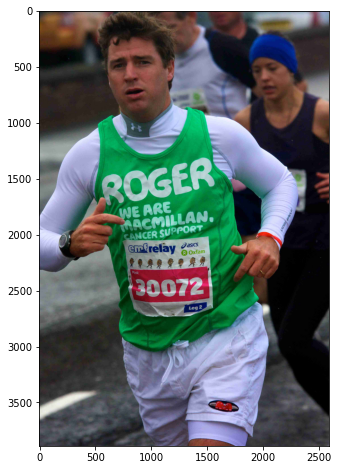

In [43]:

img_id = imgIds[np.random.randint(2,len(imgIds))]
print(img_id)

img = coco.loadImgs(img_id)[0]

img_name = '%s/%s/%s'%(dataDir,dataType,img['file_name'])
print(img_name)

I = io.imread(img_name)
plt.figure()
plt.imshow(I)

In [44]:
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds)
anns = coco.loadAnns(annIds)

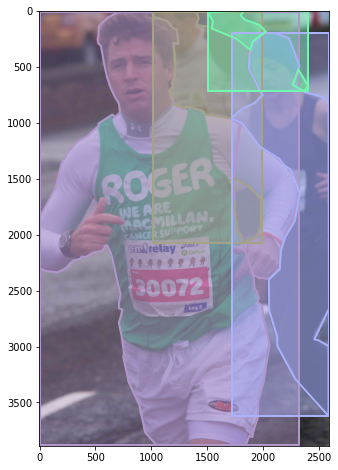

In [45]:
# load and display instance annotations
plt.imshow(I)
coco.showAnns(anns, draw_bbox=True)

In [20]:
%cd /content/detr

/content/detr


In [ ]:
!python main.py \
  --dataset_file "custom" \
  --coco_path "/content/data/custom/" \
  --output_dir "/content/drive/My Drive/backup5" \
  --resume "/content/drive/My Drive/backup5/checkpoint.pth" \
  --num_classes 29 \
  --epochs 100